**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 03:** Apresentação da Biblioteca Pytorch e Regressão Logística

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula03_pytorch_intro.ipynb)

# Objetivo da Aula

Queremos criar um oráculo e já fizemos progressos entendendo a noção de descida do gradiente. A descida do gradiente permite encontrar valores dos parâmetros de maneira mais eficiente do que uma busca exaustiva. Entretanto, muita coisa ainda pode ser melhorada na maneira como estamos escrevendo os nossos códigos, mas devemos realizar essas melhorias passo a passo.

Na aula de hoje, vamos tentar escrever códigos mais eficientes usando uma biblioteca do python que nos permitirá tratar as estruturas de dados em memória de maneira mais eficiente. Posteriormente, na próxima aula, veremos que esta biblioteca ainda poderá nos ajudar computando o gradiente por nós.

# PyTorch

O PyTorch é uma biblioteca de aprendizado de máquina de código aberto usada em aprendizado de máquina, com grande suporte a *deep learning*. Essa biblioteca foi desenvolvida pelo laboratório de pesquisa de IA do Facebook. Uma das vantagens é que o PyTorch permite utilizar programação orientada a objetos para definição de arquiteturas.

Vamos hoje conhecer um pouco mais o PyTorch e usá-lo para reescrever o que já conhecemos de aulas anteriores. Ao final da aula, vamos tentar expandir os nossos conhecimentos com um vislumbre de redes neurais.

# Tensores

Os tensores são uma estrutura de dados muito semelhantes a arrays e matrizes. No contexto de aprendizado de máquina, tensores são uma generalização de arrays e matrizes para um número arbitrário de dimensões.

Em PyTorch, usamos tensores para codificar as entradas e saídas de um modelo, assim como os parâmetros do modelo. Em outras palavras, os tensores vão unificar a organização de todos os dados que usaremos de agora em diante.

Os tensores podem executar em GPUs ou outros aceleradores de hardware.  Tensores também são otimizados para diferenciação automática. Vamos começar importando a biblioteca.

In [ ]:
import torch

**Inicialização de Tensores**

Os tensores podem ser inicializados de várias maneiras. Eles podem armazenar números em ponto flutuante de maneira organizada para as redes neurais lidarem com a informação.

Em essência, uma lista convencional de python organiza os dados na memória de uma forma em que cada elemento possui o seu próprio endereço. Os tensores do PyTorch organizam os dados de maneira contígua, o que garante um aumento de eficiência.

Dê uma olhada nos seguintes exemplos:

In [ ]:
# Criando um simples escalar
scalar = torch.tensor(10)
scalar

tensor(10)

In [ ]:
# Vendo o numero de dimensões, como
# temos um escalar, o número de
# dimensões é zero
scalar.ndim

0

In [ ]:
# Inicializando uma lista de tamanho 3 aleatoriamente entre 0 e 1
vector = torch.rand(3)
vector

tensor([0.7643, 0.7580, 0.4015])

In [ ]:
# Um vetor é unidimensional
vector.ndim

1

In [ ]:
# Inicializando aleatoriamente em uma distribuição normal
vector = torch.normal(mean = 0, std = torch.tensor([1.0]))
vector

tensor([-0.5682])

In [ ]:
# Inicializando dados com mais dimensões:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
# Número de dimensões dessa matriz
x_data.ndim

2

In [ ]:
# Podemos ver o número de elementos dentro de tensor
x_data.numel()

4

**Operações Aritméticas com Tensores**

De posse de um tensor, podemos executar várias operações matemáticas com os elementos dentro dele. Observe que as operações a seguir não precisam de um laço de repetição, como seria o caso se tivéssemos armazenado os dados com a lista padrão do python.

In [ ]:
x_data + 2

tensor([[3, 4],
        [5, 6]])

In [ ]:
x_data - 2

tensor([[-1,  0],
        [ 1,  2]])

In [ ]:
x_data * 2

tensor([[2, 4],
        [6, 8]])

In [ ]:
x_data / 2

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [ ]:
x_data // 2 ## Divisão Inteira

tensor([[0, 1],
        [1, 2]])

In [ ]:
x_data % 2 ## Resto da divisão

tensor([[1, 0],
        [1, 0]])

In [ ]:
x_data ** 2 ## Potência

tensor([[ 1,  4],
        [ 9, 16]])

In [ ]:
2 ** x_data ## Exponenciação

tensor([[ 2,  4],
        [ 8, 16]])

In [ ]:
x_data * x_data

tensor([[ 1,  4],
        [ 9, 16]])

In [ ]:
x_data / x_data

tensor([[1., 1.],
        [1., 1.]])

**Exercício**

Vamos dar uma pausa para resolver o seguinte exercício. Vamos supor que temos um vetor chamado de y com valores 0 ou 1. Além disso, temos um vetor chamado de y_pred com valores reais no intervalo entre 0 e 1. Da seguinte forma:

In [ ]:
y = torch.tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1.])

y_pred = torch.tensor([0.99,0.01,0.98,0.12,0.99,0.01,0.99,0.99,0.01,0.99,0.01,
        0.99,0.99,0.01,0.99,0.01,0.12,0.99,0.01,0.99,0.01,0.01,0.99,0.82,0.98,
        0.99,0.01,0.99,0.99,0.99,0.97,0.99,0.50,0.99,0.98,0.01,0.01,0.99,0.03,
        0.99,0.99,0.02,0.99,0.02,0.97,0.99,0.27,0.01,0.99,0.03,0.99,0.99,0.01,
        0.99,0.01,0.99,0.92,0.27,0.99,0.99,0.03,0.99,0.01,0.99,0.05,0.99,0.99,
        0.99,0.38,0.97,0.99,0.01,0.99,0.92,0.12,0.99,0.05,0.99,0.99,0.99,0.99,
        0.99,0.88,0.38,0.97,0.99,0.99,0.99,0.01,0.99,0.05,0.99,0.01,0.99,0.18,
        0.95,0.99,0.99,0.01,0.99,0.12,0.99,0.01,0.99,0.99,0.01,0.99,0.01,0.99,
        0.99,0.99,0.03,0.99,0.99,0.03,0.99,0.01,0.99,0.03,0.99,0.01,0.82,0.99,
        0.01,0.99,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,
        0.99,0.01,0.99,0.99,0.05,0.99,0.99,0.99,0.03,0.99,0.01,0.99,0.01,0.99,
        0.99,0.38,0.99,0.92,0.88,0.99,0.99,0.01,0.99,0.01,0.99,0.02,0.99,0.50,
        0.99,0.18,0.99,0.01,0.99,0.01,0.01,0.99,0.73,0.99,0.99,0.97,0.01,0.99,
        0.98,0.01,0.99,0.99,0.99,0.01,0.99,0.99,0.01,0.99,0.01,0.99,0.01,0.99,
        0.99,0.99,0.99,0.99,0.99,0.01,0.99,0.05,0.99,0.99,0.01,0.99,0.01,0.99,
        0.99,0.01,0.99,0.92,0.99,0.01,0.99,0.27,0.99,0.01,0.99,0.01,0.99,0.01,
        0.99,0.01,0.99,0.99,0.99,0.99,0.99,0.88,0.99,0.88,0.01,0.99,0.01,0.99,
        0.01,0.01,0.99,0.99,0.27,0.99,0.01,0.99,0.18,0.99,0.99,0.01,0.99,0.62,
        0.98,0.01,0.99,0.97,0.97,0.99,0.99,0.92,0.99,0.01,0.99,0.99,0.99,0.02,
        0.99,0.01,0.05,0.99,0.99,0.01,0.99,0.01,0.98])


y.shape, y_pred.shape

(torch.Size([272]), torch.Size([272]))

Agora crie uma função que implementa *erro quadrático médio* aprendido em aulas anteriores com essas estruturas.

In [ ]:
#ToDo: Implemente a função abaixo
def erro_quadratico_medio(y_pred, y) :
    erro = (y_pred - y) ** 2
    soma = torch.sum(erro)
    return soma.item()/y_pred.numel()

erro_quadratico_medio(y_pred, y)

0.03068603136960198

Vale mencionar que esta função já está implementada na biblioteca PyTorch. Nesse caso, o seu valor deverá ser igual ao visto a seguir:

In [ ]:
loss_fn = torch.nn.MSELoss()
loss_fn(y_pred, y).item()

0.03068603202700615

Uma outra função interessante de se programar é a função de custo conhecida como *entropia cruzada binária*, cuja fórmula é:
$$ -\frac{1}{n} \sum_{i=1}^n  [ y_i \log(\hat y_i) + (1-y_i)  \log(1-\hat y_i) ]$$


In [ ]:
from numpy import log
# ToDo: Implemente esta função abaixo.
def entropia_cruzada_binaria(y_pred, y) :
    entropia = y * log(y_pred) + (1 - y) * log(1 - y_pred)
    soma = torch.sum(entropia)
    return -1/y_pred.numel() * soma

entropia_cruzada_binaria(y_pred, y)

tensor(0.1270)

Vale também mencionar que esta função já está implementada na biblioteca PyTorch. Nesse caso, o seu valor deverá ser igual ao visto a seguir:

In [ ]:
loss_fn = torch.nn.BCELoss()
loss_fn(y_pred, y).item()

0.12697304785251617

**Operações de Comparação com Tensores**

A seguir, um conjunto de operações de comparação que permitem gerar tensores binários.

In [ ]:
x_data > 2

tensor([[False, False],
        [ True,  True]])

In [ ]:
x_data != 3

tensor([[ True,  True],
        [False,  True]])

In [ ]:
1 < x_data

tensor([[False,  True],
        [ True,  True]])

In [ ]:
x_data == 3

tensor([[False, False],
        [ True, False]])

In [ ]:
x_data ** 2 > 10

tensor([[False, False],
        [False,  True]])

In [ ]:
2 ** (x_data < 4)

tensor([[2, 2],
        [2, 1]])

**Operações booleanas com Tensores**

In [ ]:
a = torch.Tensor([True, False, True, False])
b = torch.Tensor([True, True, False, False])

In [ ]:
torch.logical_and(a, b)

tensor([ True, False, False, False])

In [ ]:
torch.logical_or(a, b)

tensor([ True,  True,  True, False])

In [ ]:
torch.logical_not(a)

tensor([False,  True, False,  True])

**Exercício**

Vamos dar uma segunda pausa para que você possa usar os vetores $y$ e $\hat y$ novamente. Escreva uma função que retorne um vetor de booleanos em que cada posição $i$ desse vetor deve ser preenchida da seguinte forma:

* **True**: se $y_i$ e $\hat y_i$ forem ambos maiores que 0.5
* **True**: se $y_i$ e $\hat y_i$ forem ambos menores ou iguais a 0.5
* **False**: qualquer outra situação.

In [ ]:
# ToDo: Implemente a função a seguir
def right_predictions(y_pred, y) :
    return torch.logical_or((torch.logical_and(y > 0.5, y_pred > 0.5)), (torch.logical_and(y <= 0.5, y_pred <= 0.5)))

right_predictions(y_pred, y)

tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

Compare sua resposta com o resultado a seguir:

In [ ]:
answer = torch.tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])
answer

tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

**Outras Inicializações de Tensores**

In [ ]:
# Inicializando uma matriz identidade 3 x 3
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
# Inicializando uma matriz identidade 5 x 5
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
# Criando um intervalo linear entre 2 e 10
# com 25 elementos
torch.linspace(2, 10, steps = 25)

tensor([ 2.0000,  2.3333,  2.6667,  3.0000,  3.3333,  3.6667,  4.0000,  4.3333,
         4.6667,  5.0000,  5.3333,  5.6667,  6.0000,  6.3333,  6.6667,  7.0000,
         7.3333,  7.6667,  8.0000,  8.3333,  8.6667,  9.0000,  9.3333,  9.6667,
        10.0000])

In [ ]:
# Criando um intervalo logarítmico entre 10^2 e 10^10
# com 25 elementos
torch.logspace(2, 10, steps = 25)

tensor([1.0000e+02, 2.1544e+02, 4.6416e+02, 1.0000e+03, 2.1544e+03, 4.6416e+03,
        1.0000e+04, 2.1544e+04, 4.6416e+04, 1.0000e+05, 2.1544e+05, 4.6416e+05,
        1.0000e+06, 2.1544e+06, 4.6416e+06, 1.0000e+07, 2.1544e+07, 4.6416e+07,
        1.0000e+08, 2.1544e+08, 4.6416e+08, 1.0000e+09, 2.1544e+09, 4.6416e+09,
        1.0000e+10])

In [ ]:
# Com valores aleatórios ou constantes:

# Shape é um tuple de dimensões tensoriais. Nas
# funções abaixo, determinamos  a dimensionalidade
# do tensor que criamos.

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2038, 0.9290, 0.2373],
        [0.0928, 0.7225, 0.0992]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# Inicializando de outro Tensor:
##  O novo tensor retém as propriedades (forma, tipo de dados)
##  do tensor do argumento, a menos que seja explicitamente anulado.

x_ones = torch.ones_like(x_data) # mantém a propriedade de x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # muda as propriedades x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9106, 0.8667],
        [0.8124, 0.0463]]) 



**Mínimos e Máximos**

In [ ]:
# Encontrando o mínimo
d = torch.randn(4,5)
d

tensor([[-1.0484,  1.3298, -0.3366, -0.4887,  1.0013],
        [-0.4949, -0.6395,  0.7628,  0.9701,  0.7772],
        [-1.9338, -1.1472, -0.4448, -0.8390,  0.0405],
        [-0.1018,  0.9952, -0.2011,  0.7559,  0.0869]])

In [ ]:
## Argmin devolve os índices dos mínimos de uma dada dimensão
## Por exemplo, para a dimensão das linhas
d.argmin(dim=0)

tensor([2, 2, 2, 2, 2])

In [ ]:
## Argmin devolve os índices dos mínimos de uma dada dimensão
## Por exemplo, para a dimensão das colunas
d.argmin(dim=1)

tensor([0, 1, 0, 2])

**Atributos de Tensores**

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape (formato) do Tensor: {tensor.shape}")
print(f"Datatype (tipo de dado) do Tensor: {tensor.dtype}")
print(f"Device onde o tensor está armazenado: {tensor.device}")

Shape (formato) do Tensor: torch.Size([3, 4])
Datatype (tipo de dado) do Tensor: torch.float32
Device onde o tensor está armazenado: cpu


**Operações avançadas com Tensores**

Em PyTorch temos mais de 100 operações tensoriais, incluindo aritmética, álgebra linear, manipulação de matrizes (transposição,
indexação, fatiamento), amostragem e muito mais. Para mais operações interessantes sugiro procurar [aqui](https://pytorch.org/docs/stable/torch.html).

Cada uma destas operações pode ser executada na GPU (em velocidades tipicamente mais altas do que em uma
CPU). No Colab, alocar uma GPU é feito indo em Runtime > Change runtime type > GPU.

Por padrão, os tensores são criados na CPU. Precisamos mover explicitamente os tensores para a GPU usando
método ``.to'' (depois de verificar a disponibilidade da GPU). Tenha em mente que a cópia de grandes tensores
através de dispositivos pode ser caro em termos de tempo e memória!

In [ ]:
# Movemos nosso tensor para a GPU, se disponível
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [ ]:
## Indexação e Slices
tensor = torch.ones(4, 4)
print(f"Tensor: {tensor}")
print(f"Primeira Linha: {tensor[0]}")
print(f"Primeira coluna: {tensor[:, 0]}")
print(f"Última column: {tensor[:, -1]}")

Tensor: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Primeira Linha: tensor([1., 1., 1., 1.])
Primeira coluna: tensor([1., 1., 1., 1.])
Última column: tensor([1., 1., 1., 1.])


In [ ]:
## Alterando última coluna de todas as linhas
tensor[:,-1] = 0
print(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


**Unindo tensores**

 Você pode utilizar ``torch.cat``` para concatenar uma seqüência de tensores ao longo de uma dada dimensão.


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]])


**Transposta de um Tensor**

In [ ]:
tensor.T

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])

**Multiplicação de Tensores**

In [ ]:
tensor.matmul(tensor)

tensor([[3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.]])

In [ ]:
tensor @ tensor

tensor([[3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.]])

In [ ]:
tensor

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

**Produto de Tensores (elemento a elemento)

In [ ]:
tensor * tensor

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

In [ ]:
tensor.mul(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

**Conversão de Tensores para Python**

Se você tiver um tensor de um elemento, você pode convertê-lo em um valor numérico padrão do Python
 utilizando ``item()``:

In [ ]:
agg = tensor.sum()
agg

tensor(12.)

In [ ]:
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


Se você tiver um tensor de vários elemento, você pode convertê-lo em uma lista padrão do Python
 utilizando ``tolist()``:

In [ ]:
python_list = tensor.tolist()
print(python_list, type(python_list))

[[1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0]] <class 'list'>


# Descida do Gradiente com PyTorch

No seu núcleo, PyTorch fornece diferenciação automática para a construção e formação de redes neurais. Assim, quando a função que queremos adequar aos nossos dados fica muito complexa, como é o caso de uma rede neural, não será fácil gerar código manual para efetuar os cálculos. O PyTorch fornece a diferenciação automática (autograd) para que não tenhamos que nos preocupar com as derivadas.

Para usar a diferenciação automática, devemos nos preocupar com dois conceitos, que já conhecemos, apenas não demos nomes para eles:

1. **forward pass**: o ato de computar o resultado da função que queremos ajustar aos dados. Por exemplo, dados valores para $a$, $b$, $c$ e $d$ de uma função $f_{deg3}(x) = dx^3+ cx^2 + bx+a$, computar o valor $f_{deg3}(x)$ para um $x$ qualquer seria um forward pass.

2. **backward pass**: o ato de computar as derivadas parciais para os coeficientes, dado que temos o gradiente da saída da função. Isso permite que os pesos sejam atualizados, como vimos anteriormente.

Vamos introduz os conceitos fundamentais da PyTorch com a função do terceiro grau. Futuramente, vamos voltar ao PyTorch e tentar simplificar algumas coisas. O propósito inicial é se habituar com os códigos e depois as coisas ficarão mais fáceis de entender.

A seguir, criaremos código do modo como um programador mais experiente em PyTorch faria.

**Processando a entrada**

A entrada das nossas funções tem sido o valor de $x$. Por eficiência, vamos criar para cada entrada um novo vetor contendo $x, x^2 e x^3$, o que nos permitirá multiplicar com os coeficientes a, b, c e d

In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt


###############################################
# Banco de Dados: Old Faithful
#
# Descrição
# Tempo de espera entre as erupções e a duração
# da erupção do gêiser Old Faithful no Parque
# Nacional de Yellowstone, Wyoming, EUA.
#
# Formato
# Um DataFrame com 272 observações em 2 variáveis.
#
# [,1]	eruptions	numeric	 Tempo de Erupção em minutos
# [,2]	waiting	numeric	 Tempo de espera para a
#                        próxima erupção (em minutos)
###############################################

faithful = pd.read_csv("/content/faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [ ]:
## Utilizando os tensores do PyTorch

y = torch.tensor(faithful.eruptions.values, dtype = torch.float)
x = torch.tensor(faithful.waiting.values, dtype = torch.float)

In [1]:
print(x.shape)
print(x)

NameError: ignored

In [ ]:
## Vamos primeiramente adicionar uma dimensão no vetor
xx = x.unsqueeze(-1)
print(xx.shape)
print(xx)

torch.Size([272, 1])
tensor([[79.],
        [54.],
        [74.],
        [62.],
        [85.],
        [55.],
        [88.],
        [85.],
        [51.],
        [85.],
        [54.],
        [84.],
        [78.],
        [47.],
        [83.],
        [52.],
        [62.],
        [84.],
        [52.],
        [79.],
        [51.],
        [47.],
        [78.],
        [69.],
        [74.],
        [83.],
        [55.],
        [76.],
        [78.],
        [79.],
        [73.],
        [77.],
        [66.],
        [80.],
        [74.],
        [52.],
        [48.],
        [80.],
        [59.],
        [90.],
        [80.],
        [58.],
        [84.],
        [58.],
        [73.],
        [83.],
        [64.],
        [53.],
        [82.],
        [59.],
        [75.],
        [90.],
        [54.],
        [80.],
        [54.],
        [83.],
        [71.],
        [64.],
        [77.],
        [81.],
        [59.],
        [84.],
        [48.],
        [82.],
        [60.],
    

In [ ]:
## Criando a entrada, que contém 0, x, x^2 e x^3
p = torch.tensor([0, 1, 2, 3])
xx = xx.pow(p)
xx

tensor([[1.0000e+00, 7.9000e+01, 6.2410e+03, 4.9304e+05],
        [1.0000e+00, 5.4000e+01, 2.9160e+03, 1.5746e+05],
        [1.0000e+00, 7.4000e+01, 5.4760e+03, 4.0522e+05],
        ...,
        [1.0000e+00, 9.0000e+01, 8.1000e+03, 7.2900e+05],
        [1.0000e+00, 4.6000e+01, 2.1160e+03, 9.7336e+04],
        [1.0000e+00, 7.4000e+01, 5.4760e+03, 4.0522e+05]])

Os valores da entrada estão muito altos, o que posteriormente vai fazer com que tenhamos muito trabalho em configurar a taxa de aprendizado, dado que alguns elementos vão dominar os demais. Nesse caso, podemos sempre tentar no mínimo duas técnicas de normalização.

1. Colocar todos os números no intervalo entre zero e 1. Nesse caso, basta:
  * Subtrair todos os valores pelo valor mínimo na coluna.
  * Dividir pelo novo máximo da coluna após a subtração, o que acaba sendo igual ao antigo máximo menos o antigo mínimo.
  
2. Colocar a média em zero e o desvio padrão em 1.
  * Computar a média e o desvio padrão atual.
  * Sutrair todos os elementos pela média.
  * Dividir pelo desvio padrão atual.

Vamos tentar a primeira abordagem.

In [ ]:
## Computando máximo e mínimo de cada coluna
maximo = xx.max(axis = 0).values
minimo = xx.min(axis = 0).values

# Para não dar divisão por zero na primeira
# coluna com todos os elementos 1
minimo[0] = 0

## Normalizando
xx = (xx - minimo)/(maximo - minimo)

xx

tensor([[1.0000, 0.6792, 0.5962, 0.5136],
        [1.0000, 0.2075, 0.1448, 0.0968],
        [1.0000, 0.5849, 0.4923, 0.4045],
        ...,
        [1.0000, 0.8868, 0.8485, 0.8066],
        [1.0000, 0.0566, 0.0362, 0.0221],
        [1.0000, 0.5849, 0.4923, 0.4045]])

**Vetor de Coeficientes**

Anteriormente, colocávamos os valores de $a$, $b$, $c$ e $d$ em variáveis. Entretanto, é mais eficiente colocar em um tensor, como a seguir.

Note que colocamos **requires_grad=True**, que significa que queremos que o gradiente seja computado em função das variáveis dentro deste vetor.

In [ ]:
## As variáveis a, b, c e d estão no tensor a seguir
## inicializado ao acaso
coef = torch.rand(4, requires_grad=True)
coef

tensor([0.9558, 0.8770, 0.7282, 0.8503], requires_grad=True)

**Passo forward**

Podemos computar a função para todas as instâncias de uma só vez, sem laço de repetição, usando **torch.inner**.

In [ ]:
forward = torch.inner(xx, coef)
forward.shape

torch.Size([272])

**Função de Erro**

O pytorch também contém definições de funções de erro populares. A que temos
usado até agora é próxima do que chamamos de "Erro Quadrático Médio". Então,
usaremos MSE como nossa função de erro.

In [ ]:
loss_fn = torch.nn.MSELoss()

**Treinamento**

Vamos agora realizar o treinamento. O que você deve observar a seguir é:

In [ ]:
# Configurando a taxa de aprendizado.
# Vamos deixar um valor alto como sendo
# o máximo que a taxa de aprendizado
# pode receber. Daí, vamos construir
# a taxa dentro do laço
max_learning_rate = 0.5

epochs = 1000000
for t in range(epochs):

    # Gerando taxa de aprendizado.
    learning_rate = max_learning_rate * (1 - t/epochs)

    # Forward pass: podemos passar a entrada para o modelo.
    y_pred = torch.inner(xx, coef)

    # Computa e imprime o erro. Passamos tensores contendo os valores preditos e
    # os valores reais e a loss retorna um tensor contendo o erro.
    loss = loss_fn(y_pred, y)

    ## Imprimindo dez vezes a loss
    if t % (epochs / 10) == 0 :
        print(t, loss.item())


    # Backward pass:  computar o gradiente da loss em relação a todos os
    # coeficientes a serem aprendidos no modelo.
    loss.backward()


    # Atualizar os pesos usando a descida por gradiente, como fizemos anteriormente.
    # Cada parâmetro é um Tensor,então podemos acessar seus gradientes como
    # fizemos antes.
    coef.data -= learning_rate * coef.grad.data

    # Limpamos os gradientes antes da próxima iteração
    coef.grad.data.zero_()

0 2.4040939807891846
100000 0.22106507420539856
200000 0.21208281815052032
300000 0.2056867629289627
400000 0.20109684765338898
500000 0.19778957962989807
600000 0.19542138278484344
700000 0.1937762200832367
800000 0.1926984339952469
900000 0.19207309186458588


In [ ]:
coef.tolist()

[1.6288635730743408, -34.1385612487793, 82.75334930419922, -45.84287643432617]

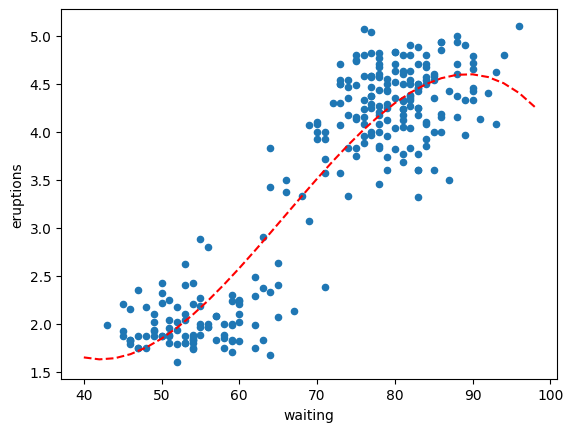

In [ ]:
## Plotando os gráficos
faithful.plot.scatter(x='waiting',
                      y='eruptions')

# Gerando eixo_x
eixo_x = torch.tensor(range(40,100,2))

# Computando 1, x, x^2, x^3
eixo_xx = eixo_x.unsqueeze(-1)
p = torch.tensor([0, 1, 2, 3])
eixo_xx = eixo_xx.pow(p)

# Normalizando os valores do eixo_x
normal_xx = (eixo_xx - minimo)/(maximo - minimo)

## Obtendo o eixo_y para esses valores
eixo_y = torch.inner(normal_xx, coef)

## Plotando a reta
plt.plot(eixo_x.tolist(), eixo_y.tolist(), 'r--', label='Valores Obtidos')

## Recaptulando

Na aula de hoje, aprendemos a usar o PyTorch, interpretando as suas funcionalidades em duas vertentes:

1. Possui uma estrutura de dados chamada Tensor, que permite realizar cálculos numéricos de maneira eficiente.
2. Possui uma forma de computar os gradientes da função de curso em função das variáveis que configuraram **requires_grad** como **True**.

Além dessas funcionalidades, o PyTorch possui várias funções, como a MSELoss e a BCELoss, que tornam a implementação dos algoritmos de aprendizado mais fáceis.